## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### K-means - Demo 1

* Utilização do algoritmo K-means com parâmetros padrões.
* Base de dados Iris, muito comum para exemplos
  * Utilização de apenas dois atributos
* Utilização do método Elbow para escolhar do melhor número de clusters

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(context='talk')

### Carregar a base de dados e inspecionar algumas informações

In [3]:
df = pd.read_csv('../datasets/iris/iris.data')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Neste exemplo, vamos usar apenas duas colunas (petal length e petal width)
df_train = df[df.columns[2:4]]
df_labels = df[df.columns[4]]

df_train.head()

,petal length in cm,petal width in cm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Método elbow

In [5]:
%%time

min_clusters = 1
max_clusters = int(np.sqrt(len(df)))

clusters_range = range(min_clusters, max_clusters + 1)

inertias = []

for k in clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(df_train)
    
    cur_inertia = model.inertia_
    inertias.append(cur_inertia)

CPU times: user 392 ms, sys: 463 µs, total: 392 ms
Wall time: 419 ms


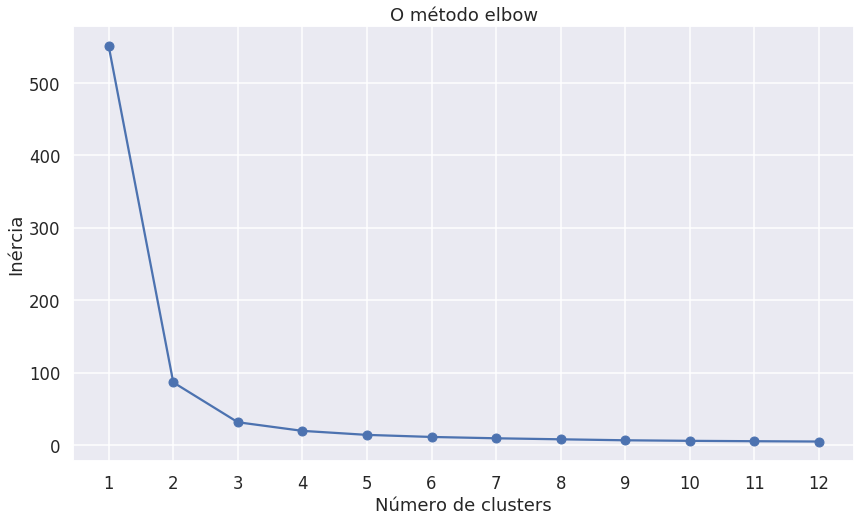

In [6]:
_ = plt.plot(clusters_range, inertias, '-o')
_ = plt.title('O método elbow')
_ = plt.xlabel('Número de clusters')
_ = plt.ylabel('Inércia')
_ = plt.xticks(clusters_range)
plt.show()

### Testar K-Means com valor K=3

In [7]:
k = 3

model = KMeans(n_clusters=k)
model.fit(df_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Plotar resultados

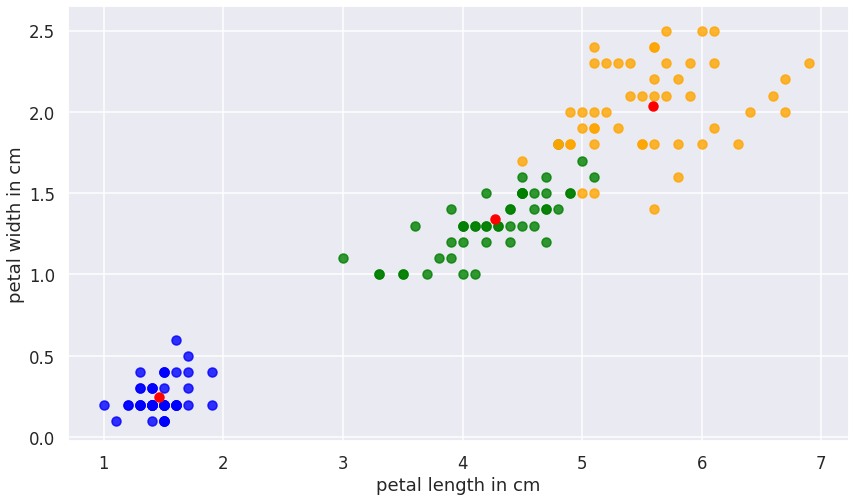

In [8]:
columns_names = df_train.columns

dim_x = 0
dim_y = 1

xs = df_train[df_train.columns[dim_x]]
ys = df_train[df_train.columns[dim_y]]

color_dict = {
    'Iris-setosa': 'blue',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'orange'
}


for (x, y, l) in zip(xs, ys, df_labels):
    _ = plt.scatter(x, y, alpha=0.8, color=color_dict[l])

_ = plt.xlabel(columns_names[dim_x])
_ = plt.ylabel(columns_names[dim_y])

centroids = model.cluster_centers_
centroids_x = centroids[:,dim_x]
centroids_y = centroids[:,dim_y]

_ = plt.scatter(centroids_x, centroids_y, color='red', s=80)